In [4]:
import pandas as pd

df = pd.read_csv('classification/data/traffic_accidents.csv')
print(f"Shape: {df.shape})")
df.head()

Shape: (209306, 24))


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [15]:
print("Bad Values Count:")
print(f"Total Bad values: {df.isnull().sum().sum() + df.isna().sum().sum()}")

Bad Values Count:
Total Bad values: 0


In [9]:
# Examine data types and identify categorical columns
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print("\n" + "="*50 + "\n")

# Check unique values for each categorical column
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"{col}: {n_unique} unique values")
    if n_unique <= 10:  # Show values if there are 10 or fewer
        print(f"  Values: {df[col].unique()}")
    print()

Data Types:
crash_date                        object
traffic_control_device            object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
crash_type                        object
intersection_related_i            object
damage                            object
prim_contributory_cause           object
num_units                          int64
most_severe_injury                object
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtyp

STATISTICAL ANALYSIS - TRAFFIC ACCIDENTS DATASET

1. DESCRIPTIVE STATISTICS - NUMERICAL FEATURES
------------------------------------------------------------
           num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
count  209306.000000   209306.000000   209306.000000            209306.000000   
mean        2.063300        0.382717        0.001859                 0.038102   
std         0.396012        0.799720        0.047502                 0.233964   
min         1.000000        0.000000        0.000000                 0.000000   
25%         2.000000        0.000000        0.000000                 0.000000   
50%         2.000000        0.000000        0.000000                 0.000000   
75%         2.000000        1.000000        0.000000                 0.000000   
max        11.000000       21.000000        3.000000                 7.000000   

       injuries_non_incapacitating  injuries_reported_not_evident  \
count                209306.000000         

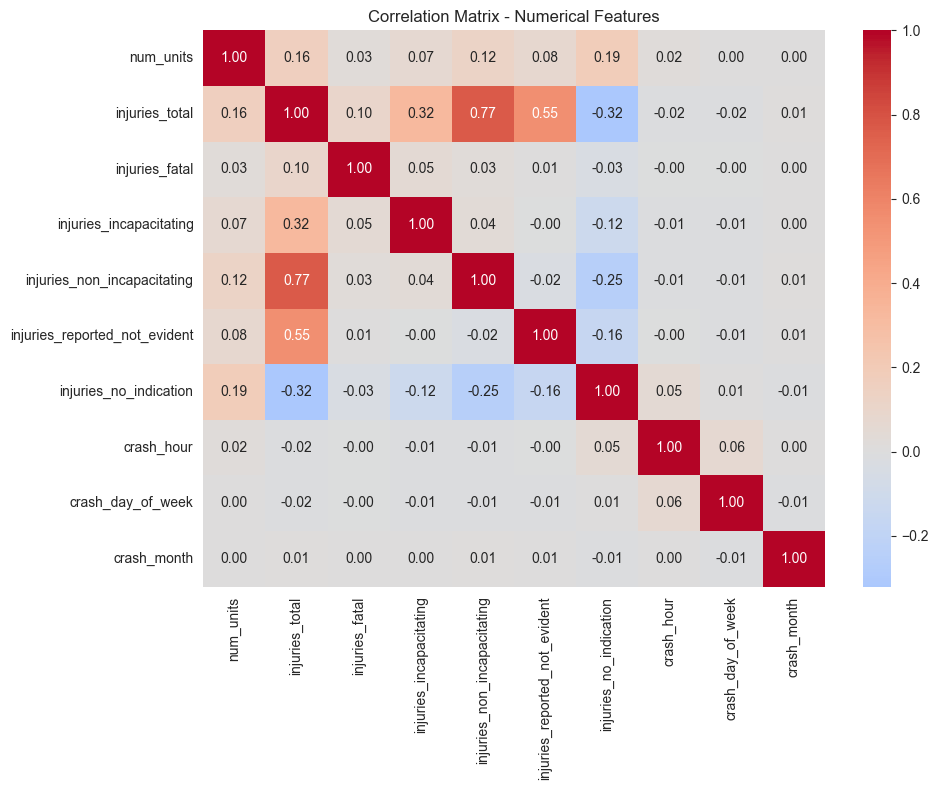


4. CATEGORICAL FEATURES - TOP VALUES
------------------------------------------------------------

crash_date:
crash_date
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
09/11/2019 04:30:00 PM     6
01/12/2019 02:30:00 PM     6
11/26/2018 08:30:00 AM     6
Name: count, dtype: int64

traffic_control_device:
traffic_control_device
TRAFFIC SIGNAL       123944
STOP SIGN/FLASHER     49139
NO CONTROLS           29508
UNKNOWN                4455
OTHER                   670
Name: count, dtype: int64

weather_condition:
weather_condition
CLEAR              164700
RAIN                21703
CLOUDY/OVERCAST      7533
SNOW                 6871
UNKNOWN              6534
Name: count, dtype: int64

lighting_condition:
lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
UNKNOWN                     4336
Name: count, dtype: int64

first_crash_type:
first_crash_type
TURNING                     641

In [5]:
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("="*60)
print("STATISTICAL ANALYSIS - TRAFFIC ACCIDENTS DATASET")
print("="*60)

# 1. NUMERICAL FEATURES ANALYSIS
print("\n1. DESCRIPTIVE STATISTICS - NUMERICAL FEATURES")
print("-" * 60)
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

# 2. DISTRIBUTION ANALYSIS
print("\n2. DISTRIBUTION ANALYSIS")
print("-" * 60)
for col in numerical_cols:
  skewness = df[col].skew()
  kurtosis = df[col].kurtosis()
  print(f"{col}:")
  print(f"  Skewness: {skewness:.3f} (Right-skewed)" if skewness > 0 else f"  Skewness: {skewness:.3f} (Left-skewed)")
  print(f"  Kurtosis: {kurtosis:.3f}")

# 3. CORRELATION ANALYSIS
print("\n3. CORRELATION MATRIX - NUMERICAL FEATURES")
print("-" * 60)
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)

# 4. VISUALIZE CORRELATIONS
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax)
plt.title("Correlation Matrix - Numerical Features")
plt.tight_layout()
plt.show()

# 5. CATEGORICAL FEATURES DISTRIBUTION
print("\n4. CATEGORICAL FEATURES - TOP VALUES")
print("-" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print(f"\n{col}:")
  print(df[col].value_counts().head(5))

# 6. KEY IMPLICATIONS & HYPOTHESES
print("\n" + "="*60)
print("KEY IMPLICATIONS & HYPOTHESES")
print("="*60)

print("\n📊 INJURY PATTERNS:")
print(f"  - Fatal injuries: {df['injuries_fatal'].sum():.0f} total")
print(f"  - Incapacitating injuries: {df['injuries_incapacitating'].sum():.0f} total")
print(f"  - Most crashes: {(df['injuries_total'] == 0).sum()} ({(df['injuries_total'] == 0).sum()/len(df)*100:.1f}%) are no-injury incidents")

print("\n🚗 VEHICLE UNITS:")
print(f"  - Average units per crash: {df['num_units'].mean():.2f}")
print(f"  - Max units in single crash: {df['num_units'].max():.0f}")

print("\n⏰ TEMPORAL PATTERNS:")
print(f"  - Peak crash hour: {df['crash_hour'].mode()[0]}")
print(f"  - Peak crash day: {df['crash_day_of_week'].mode()[0]} (1=Mon, 7=Sun)")
print(f"  - Peak crash month: {df['crash_month'].mode()[0]}")

print("\n🔗 FEATURE DEPENDENCIES (Hypotheses):")
print("  1. Crash hour likely correlates with lighting_condition (night crashes → dark)")
print("  2. Weather/lighting conditions may impact injury severity")
print("  3. First_crash_type and primary_contributory_cause are likely dependent")
print("  4. Intersection-related crashes may have different severity profiles")
print("  5. Traffic control devices presence may reduce injury severity")